## The differential scattering cross section using Mie theory

See https://pymiescatt.readthedocs.io/en/latest/forward.html#functions-for-single-particles

This notebook is for testing how [PyMieScatt](https://pymiescatt.readthedocs.io/en/latest/index.html) and [miepython](https://miepython.readthedocs.io/en/latest/index.html) work.

### Refractive Indices:
- Polypropylene, PP: 1.492 (https://www.osapublishing.org/ao/abstract.cfm?uri=ao-42-3-592)
- Polystyrene, PS: 1.593

In [1]:
import numpy as np
import matplotlib.pyplot as plt
refracParticle = 1.492
wavelen = 6.328e-07/1e-9
dia = 1700.
geometric_cross_section = np.pi * (dia*.5)**2 * 1e-14 # cm**2
thetaRange = np.linspace(0,180,1000)
mu = np.cos(np.radians(thetaRange))
nMedium = 1.332
m, x = refracParticle/nMedium, np.pi*dia/(wavelen/nMedium)
wavelen, dia, nMedium, refracParticle/nMedium, x, geometric_cross_section

(632.8,
 1700.0,
 1.332,
 1.12012012012012,
 11.241817959527067,
 2.2698006922186254e-08)

### Using [PyMieScatt](https://pymiescatt.readthedocs.io/en/latest/index.html)

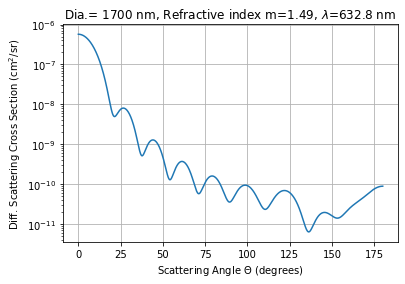

In [2]:
import PyMieScatt as ps
eff = ps.MieQ(refracParticle/nMedium, wavelen/nMedium, dia, asDict=True)
a, b = ps.AutoMie_ab(m,x)
n = np.arange(1, len(a) + 1)
norm = np.sqrt(2 * np.pi * np.sum((2 * n + 1) * (a.real + b.real))) # used in miepython internally
def getSigma(muScalar):
    S1, S2 = ps.MieS1S2(m,x, muScalar)
    S11 = 0.5*(np.abs(S2/norm)**2+np.abs(S1/norm)**2)
    return geometric_cross_section * eff['Qext'] * S11
sigma = np.array([getSigma(muScalar) for muScalar in mu])
plt.plot(thetaRange, sigma)
plt.yscale('log'); plt.grid(True)
plt.title(f"Dia.= {dia:.0f} nm, Refractive index m={refracParticle:.2f}, $\lambda$={wavelen} nm")
plt.xlabel(r"Scattering Angle $\Theta$ (degrees)");
plt.ylabel("Diff. Scattering Cross Section (cm$^2$/sr)");

### Using [miepython](https://miepython.readthedocs.io/en/latest/index.html)
See also https://miepython.readthedocs.io/en/latest/03_angular_scattering.html#Differential-Scattering-Cross-Section  
cites [Wiscombe, W. J. (1979). Mie Scattering Calculations. doi:10.5065/D6ZP4414](https://opensky.ucar.edu/islandora/object/technotes:232)

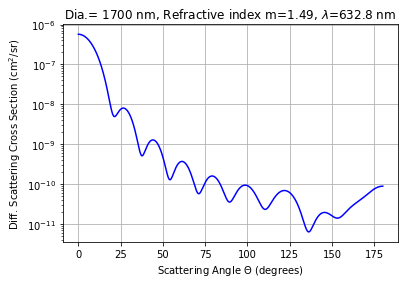

In [3]:
import miepython
qext, qsca, qback, g = miepython.mie(m,x)
sigma_sca = geometric_cross_section * qext * miepython.i_unpolarized(m,x,mu)
plt.plot(thetaRange, sigma_sca, color='blue')
plt.yscale('log'); plt.grid(True)
plt.title(f"Dia.= {dia:.0f} nm, Refractive index m={refracParticle:.2f}, $\lambda$={wavelen} nm")
plt.xlabel(r"Scattering Angle $\Theta$ (degrees)");
plt.ylabel("Diff. Scattering Cross Section (cm$^2$/sr)");